## Examples for the convergence of continuous SxPID with the number of bins for bivariate continuous-input tasks

In [1]:
from sxpid import SxPID
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate data
def generate_binned_data(n_bins, task):
    S = np.mgrid[0:n_bins, 0:2*n_bins].reshape(2, -1).T

    T = task(S[:,0]/n_bins, S[:,1]/n_bins)
    T_binned = (T * n_bins).astype(int)

    idxs = np.concatenate((S, T_binned[:, np.newaxis]), axis=1)
    probs = np.ones((idxs.shape[0],)) / idxs.shape[0]
    return idxs, probs

In [3]:
atoms = [((1,), (2,)), ((1,),), ((2,),), ((1, 2),)]

def perform_binned_pid(n_bins, task):
    idxs, probs = generate_binned_data(n_bins, task)
    pdf = SxPID.PDF(idxs, probs)
    _, avg_dict = SxPID.pid(pdf, no_threads=12)
    avg = np.array([avg_dict[atom] for atom in atoms])
    return avg

n_bins = np.unique(np.logspace(1, 8, base=2, num=20, dtype=int))
print(n_bins)

[  2   3   4   5   7   9  11  15  19  25  33  42  55  71  92 118 153 198
 256]


In [4]:
def plot_pid(n_bins, pid):
    #Print PID atoms for highest number of bins
    print('Informative: ')
    print(dict(zip(atoms, pid[-1, :, 0])))
    print('Misinformative: ')
    print(dict(zip(atoms, pid[-1, :, 1])))
    print('Added: ')
    print(dict(zip(atoms, pid[-1, :, 2])))


    plt.stackplot(n_bins, pid[:,:,2].T, labels=map(str, atoms))
    plt.xscale('log')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], title='PID Atoms', loc='upper right')
    plt.grid()

    plt.figure()
    for i in range(4):
        plt.plot(n_bins, pid[:,i,2], label=str(atoms[i]))

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], title='PID Atoms', loc='upper right')
    plt.xscale('log')
    plt.grid()

In [5]:
#Calculate xor
xor = lambda a, b: (a >= 0.5) ^ (b >= 0.5)
pid_xor = np.array([perform_binned_pid(n, xor) for n in n_bins])

100%|██████████| 65536/65536 [07:15<00:00, 150.48it/s]


Informative: 
{((1,), (2,)): 7.002820519073593, ((1,),): 0.9971794809385692, ((2,),): 0.9971794809385692, ((1, 2),): 7.002820519073593}
Misinformative: 
{((1,), (2,)): 7.005646563136074, ((1,),): 0.9943534368580027, ((2,),): 0.9943534368580027, ((1, 2),): 6.005646563136239}
Added: 
{((1,), (2,)): -0.0028260440787653517, ((1,),): 0.0028260440787640857, ((2,),): 0.0028260440787640857, ((1, 2),): 0.9971739559201726}


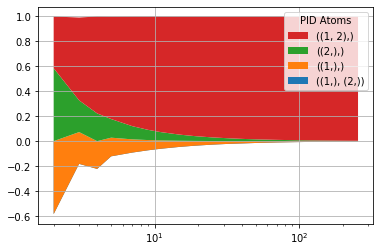

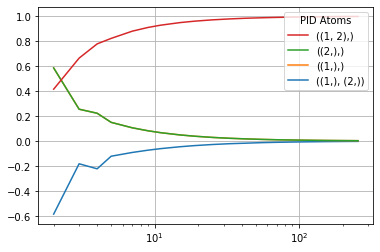

In [6]:
#Plot xor
plot_pid(n_bins, pid_xor)

In [5]:
#Calculate and
andd = lambda a, b: (a >= 0.5) & (b >= 0.5)
pid_and = np.array([perform_binned_pid(n, andd) for n in n_bins])

100%|██████████| 65536/65536 [05:22<00:00, 203.03it/s]


Informative: 
{((1,), (2,)): 7.002820519073593, ((1,),): 0.9971794809385692, ((2,),): 0.9971794809385692, ((1, 2),): 7.002820519073593}
Misinformative: 
{((1,), (2,)): 6.650238355132093, ((1,),): 1.0384835204113614, ((2,),): 1.0384835204115619, ((1, 2),): 6.461516479588903}
Added: 
{((1,), (2,)): 0.35258216393322306, ((1,),): -0.041304039473958186, ((2,),): -0.04130403947392963, ((1, 2),): 0.5413040394742274}


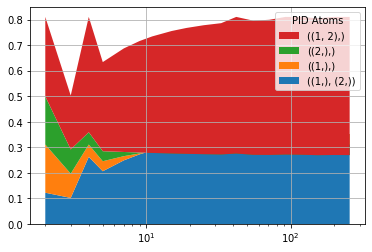

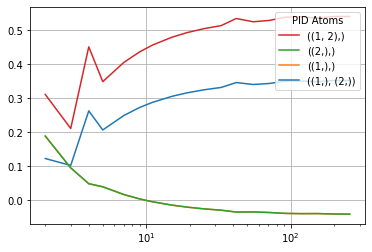

In [6]:
#Plot and
plot_pid(n_bins, pid_and)

In [4]:
#Calculate unq
unq = lambda a, b: a >= 0.5
pid_unq = np.array([perform_binned_pid(n, unq) for n in n_bins])

100%|██████████| 65536/65536 [06:13<00:00, 175.32it/s]


Informative: 
{((1,), (2,)): 7.002820519073593, ((1,),): 0.9971794809385692, ((2,),): 0.9971794809385692, ((1, 2),): 7.002820519073593}
Misinformative: 
{((1,), (2,)): 6.418799418079511, ((1,),): 0.5812005819245061, ((2,),): 1.5812005819270816, ((1, 2),): 6.418799418079511}
Added: 
{((1,), (2,)): 0.5840211009877492, ((1,),): 0.41597889901204077, ((2,),): -0.5840211009877492, ((1, 2),): 0.5840211009877492}


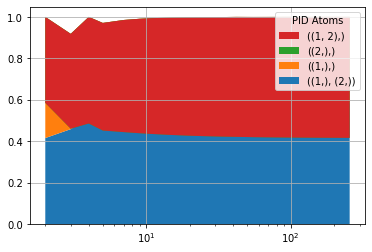

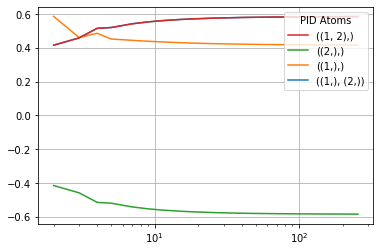

In [7]:
#Plot unq
plot_pid(n_bins, pid_unq)

In [5]:
#Calculate sum
summ = lambda a, b: a + b
pid_sum = np.array([perform_binned_pid(n, summ) for n in n_bins])

100%|██████████| 65536/65536 [05:30<00:00, 198.04it/s]


Informative: 
{((1,), (2,)): 7.002820519073593, ((1,),): 0.9971794809385692, ((2,),): 0.9971794809385692, ((1, 2),): 7.002820519073593}
Misinformative: 
{((1,), (2,)): 7.278683776662294, ((1,),): 0.0, ((2,),): 0.0, ((1, 2),): 0.0}
Added: 
{((1,), (2,)): -0.2758632575985607, ((1,),): 0.9971794809385692, ((2,),): 0.9971794809385692, ((1, 2),): 7.002820519073593}


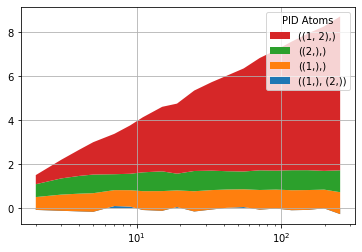

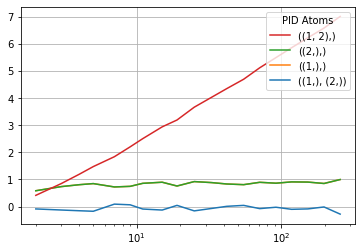

In [6]:
#Plot sum
plot_pid(n_bins, pid_sum)

In [5]:
#Calculate unq
cont_unq = lambda a, b: a
pid_cont_unq = np.array([perform_binned_pid(n, cont_unq) for n in n_bins])

100%|██████████| 65536/65536 [07:05<00:00, 154.11it/s]


Informative: 
{((1,), (2,)): 7.002820519073593, ((1,),): 0.9971794809385692, ((2,),): 0.9971794809385692, ((1, 2),): 7.002820519073593}
Misinformative: 
{((1,), (2,)): 0.0, ((1,),): 0.0, ((2,),): 8.0, ((1, 2),): 0.0}
Added: 
{((1,), (2,)): 7.002820519073593, ((1,),): 0.9971794809385692, ((2,),): -7.002820519073593, ((1, 2),): 7.002820519073593}


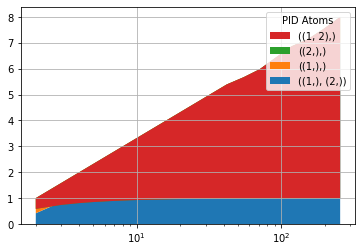

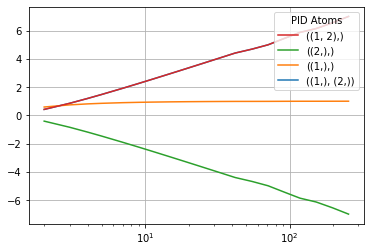

In [6]:
#Plot cont_unc
plot_pid(n_bins, pid_cont_unq)